In [28]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import statsmodels.formula.api as smf

In [7]:
#path to the data
path = "C:\\Users\\Zhenya\\Desktop\\PhD MPI NL\\Courses\\Python IMPRS\\Session5"

1. Loading the data


In [45]:
# Lexical desicion task data (from the corresponding git repository)
participants = pd.read_csv(os.path.join(path, "lexdec_results.csv"))
#print(participants)

#renaming the columns "unnamed" and "reaction_time"
participants.rename(columns={"Unnamed: 0":"trial_nr", "reaction_time":"RT" }, inplace=True)
print(participants)

     trial_nr   id     word frequency  duration        RT response  subject  \
0           0  102   labber      none  0.405079  0.740607        m        1   
1           1  163    plond      none  0.567166  0.662209        m        1   
2           2  175   nergen      none  0.544580  1.063122        m        1   
3           3   99      bij        HF  0.332517  0.751887        z        1   
4           4   94   gedaan        HF  0.624558  0.748802        z        1   
..        ...  ...      ...       ...       ...       ...      ...      ...   
795       195   50   gisten        LF  0.546621  0.785617        z        4   
796       196  195   pirrel      none  0.361179  0.733906        m        4   
797       197   24  wrongel        LF  0.538685  0.802661        m        4   
798       198  128  kandola      none  0.500204  0.880469        m        4   
799       199   88     werd        HF  0.482426  0.998699        m        4   

     accuracy  
0           1  
1           1  
2  

In [52]:
#missing values?
no_of_trials = np.shape(participants)[0]
nan_indices = np.random.permutation(no_of_trials)[0:60]
participants_NA = participants.copy()

print(no_of_trials)

#remove missing values
participants_NA.loc[nan_indices, 'RT'] = np.nan
#participants_NA
# NaNs seem to have replaced valid values in the reaction times column

#removing NaNs with dropna() from pandas
participants_dropna = participants_NA.dropna()
participants_dropna

800


,trial_nr,id,word,frequency,duration,RT,response,subject,accuracy
0,0,102,labber,none,0.405079,0.740607,m,1,1
1,1,163,plond,none,0.567166,0.662209,m,1,1
2,2,175,nergen,none,0.544580,1.063122,m,1,1
3,3,99,bij,HF,0.332517,0.751887,z,1,1
4,4,94,gedaan,HF,0.624558,0.748802,z,1,1
...,...,...,...,...,...,...,...,...,...
795,195,50,gisten,LF,0.546621,0.785617,z,4,1
796,196,195,pirrel,none,0.361179,0.733906,m,4,1
797,197,24,wrongel,LF,0.538685,0.802661,m,4,0
798,198,128,kandola,none,0.500204,0.880469,m,4,1


2. Descriptives

In [60]:

summary = summary = participants_dropna.groupby(by='frequency').aggregate(  # for multiple columns, use ['id', 'condition'] instead of just 'id'
    mean_RT=pd.NamedAgg('RT', np.mean),
    std_RT=pd.NamedAgg('RT', np.std),
    median_accuracy=pd.NamedAgg('accuracy', np.median),  # lambda data: np.mean(data) - 2
    )
summary.reset_index(inplace=True)
print(summary)



  frequency   mean_RT    std_RT  median_accuracy
0        HF  0.795493  0.165660                1
1        LF  0.862114  0.179997                1
2      none  0.843226  0.173548                1


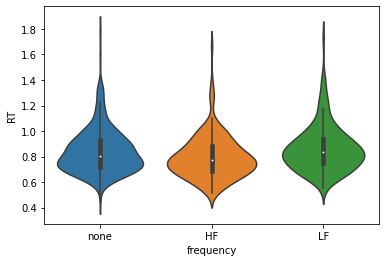

In [54]:
ax = sns.violinplot(x="frequency", y="RT", data = participants_dropna)


3. Statistical analysis

3.1  Repeated measures ANOVA to investigate if reaction times differ as a fiunction of word frequency 

In [53]:
rma = AnovaRM(participants_dropna, depvar="RT", subject="id", within=["frequency"], aggregate_func="mean").fit()
print(rma)
#ValueError: Data is unbalanced.

ValueError: Data is unbalanced.

3.2. Fitting linear mixed effects model

In [55]:
#Fixed effects for frequency and

m1  = smf.mixedlm("RT ~ frequency", participants, groups = "id", re_formula = "1" )
m1f = m1.fit()
print(m1f.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  RT      
No. Observations:    740      Method:              REML    
No. Groups:          200      Scale:               0.0300  
Min. group size:     2        Log-Likelihood:      237.9539
Max. group size:     4        Converged:           Yes     
Mean group size:     3.7                                   
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.795    0.013 62.404 0.000  0.771  0.820
frequency[T.LF]   0.067    0.018  3.700 0.000  0.031  0.102
frequency[T.none] 0.048    0.016  3.048 0.002  0.017  0.078
id Var            0.000    0.005                           

C:\Users\Zhenya\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boun